# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# !pip install citipy

In [128]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [129]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [130]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#get weather data for London and convert reponse to json
response = requests.get(query_url + 'perth')
weather_json = response.json()

# let's see the result
display(weather_json)

# query_url


{'coord': {'lon': 115.8333, 'lat': -31.9333},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 88.5,
  'feels_like': 89.15,
  'temp_min': 79.79,
  'temp_max': 96.98,
  'pressure': 1006,
  'humidity': 42},
 'visibility': 10000,
 'wind': {'speed': 21.85, 'deg': 210},
 'clouds': {'all': 0},
 'dt': 1704701105,
 'sys': {'type': 2,
  'id': 2089443,
  'country': 'AU',
  'sunrise': 1704662336,
  'sunset': 1704713192},
 'timezone': 28800,
 'id': 2063523,
 'name': 'Perth',
 'cod': 200}

In [131]:
# Set the API base URL
# url = f'https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}'
url = "https://api.openweathermap.org/data/2.5/weather?q="
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
#     city_url = url + "&q=" + city
    city_url = url + city + "&appid=" + weather_api_key + "&units="+ units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    

    # Run an API request for each of the cities
    
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | whitehorse
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | qaqortoq
Processing Record 7 of Set 1 | tofol
Processing Record 8 of Set 1 | isafjordur
Processing Record 9 of Set 1 | paracuru
Processing Record 10 of Set 1 | lompoc
Processing Record 11 of Set 1 | port mathurin
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | oamaru
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | santa maria do suacui
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | badger
Processing Record 18 of Set 1 | kamaishi
Processing Record 19 of Set 1 | nakamura
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | petropavlovsk-kamchatsky
Processing Record 22 of Set 1 | 

Processing Record 40 of Set 4 | berezovyy
Processing Record 41 of Set 4 | nsanje
Processing Record 42 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 43 of Set 4 | aasiaat
Processing Record 44 of Set 4 | arkhara
Processing Record 45 of Set 4 | keflavik
Processing Record 46 of Set 4 | ocos
Processing Record 47 of Set 4 | san benito
Processing Record 48 of Set 4 | luderitz
Processing Record 49 of Set 4 | warrenton
Processing Record 0 of Set 5 | arrifes
Processing Record 1 of Set 5 | shingu
Processing Record 2 of Set 5 | college
Processing Record 3 of Set 5 | port saint john's
Processing Record 4 of Set 5 | la'ie
Processing Record 5 of Set 5 | ploudalmezeau
Processing Record 6 of Set 5 | portes-les-valence
Processing Record 7 of Set 5 | petrovskaya
Processing Record 8 of Set 5 | lewistown
Processing Record 9 of Set 5 | grand falls-windsor
Processing Record 10 of Set 5 | carrara
Processing Record 11 of Set 5 | fuvahmulah
City not found. Skipping...
Processing Record 12 o

Processing Record 33 of Set 8 | lae
Processing Record 34 of Set 8 | calvi
Processing Record 35 of Set 8 | paramagudi
Processing Record 36 of Set 8 | manokwari
Processing Record 37 of Set 8 | rio grande
Processing Record 38 of Set 8 | jijiga
Processing Record 39 of Set 8 | pak kret
Processing Record 40 of Set 8 | hargeysa
Processing Record 41 of Set 8 | bushehr
Processing Record 42 of Set 8 | san bernardo del viento
Processing Record 43 of Set 8 | cable beach
City not found. Skipping...
Processing Record 44 of Set 8 | el hamma
Processing Record 45 of Set 8 | rampur
Processing Record 46 of Set 8 | mao
Processing Record 47 of Set 8 | lethbridge
Processing Record 48 of Set 8 | borazjan
Processing Record 49 of Set 8 | pont rouge
Processing Record 0 of Set 9 | ain sukhna
Processing Record 1 of Set 9 | uturoa
Processing Record 2 of Set 9 | maintirano
Processing Record 3 of Set 9 | newtown trim
Processing Record 4 of Set 9 | chifeng
Processing Record 5 of Set 9 | pechora
Processing Record 6 of

Processing Record 20 of Set 12 | kone
Processing Record 21 of Set 12 | slave lake
Processing Record 22 of Set 12 | korla
Processing Record 23 of Set 12 | saint croix
Processing Record 24 of Set 12 | yelizovo
Processing Record 25 of Set 12 | fort bragg
Processing Record 26 of Set 12 | road town
Processing Record 27 of Set 12 | winooski
Processing Record 28 of Set 12 | papao
Processing Record 29 of Set 12 | vila velha
Processing Record 30 of Set 12 | basco
Processing Record 31 of Set 12 | bowen
Processing Record 32 of Set 12 | yeppoon
Processing Record 33 of Set 12 | nguekhokh
Processing Record 34 of Set 12 | cruzeiro do sul
Processing Record 35 of Set 12 | nuku'alofa
Processing Record 36 of Set 12 | huarmey
Processing Record 37 of Set 12 | ibeto
Processing Record 38 of Set 12 | turpan
Processing Record 39 of Set 12 | mcpherson
Processing Record 40 of Set 12 | karratha
Processing Record 41 of Set 12 | rio gallegos
Processing Record 42 of Set 12 | gizo
Processing Record 43 of Set 12 | viq

In [133]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [134]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,38.14,97,99,6.49,AR,1704701173
1,whitehorse,60.7161,-135.0538,6.03,82,100,21.85,CA,1704701237
2,longyearbyen,78.2186,15.6401,6.64,72,75,12.66,SJ,1704701246
3,waitangi,-43.9535,-176.5597,55.81,82,17,1.01,NZ,1704701397
4,yellowknife,62.4560,-114.3525,-30.71,99,96,4.72,CA,1704701398


In [135]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [136]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,38.14,97,99,6.49,AR,1704701173
1,whitehorse,60.7161,-135.0538,6.03,82,100,21.85,CA,1704701237
2,longyearbyen,78.2186,15.6401,6.64,72,75,12.66,SJ,1704701246
3,waitangi,-43.9535,-176.5597,55.81,82,17,1.01,NZ,1704701397
4,yellowknife,62.4560,-114.3525,-30.71,99,96,4.72,CA,1704701398


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

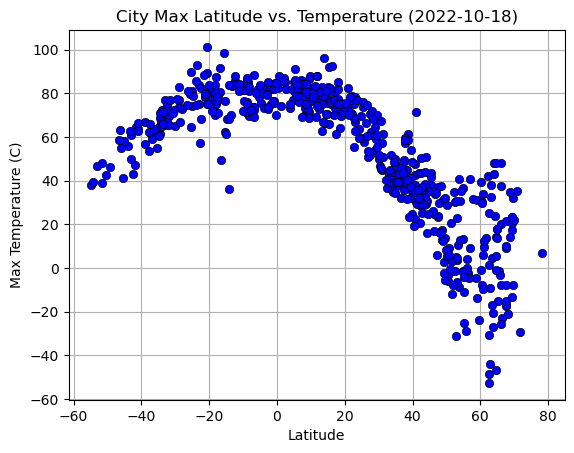

In [137]:
# Build scatter plot for latitude vs. temperature
plt.plot(city_data_df["Lat"], 
         city_data_df["Max Temp"], 
         marker="o", 
         markerfacecolor="blue",
         markeredgecolor="black", 
         markeredgewidth=0.5,
         linestyle="none")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Display the map plot
plt.show()

#### Latitude Vs. Humidity

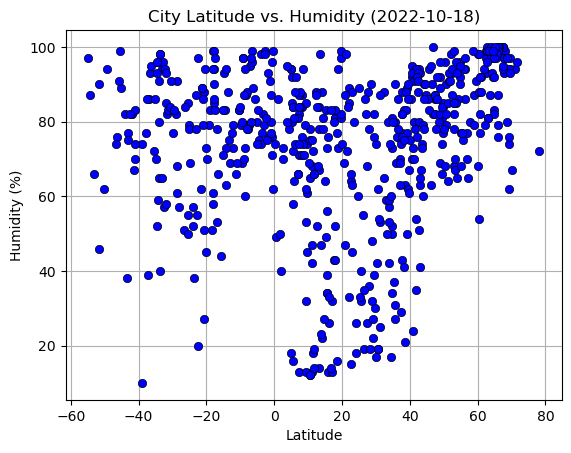

In [138]:
# Build the scatter plots for latitude vs. humidity
plt.plot(city_data_df["Lat"], 
         city_data_df["Humidity"], 
         marker="o", 
         markerfacecolor="blue",
         markeredgecolor="black", 
         markeredgewidth=0.5,
         linestyle="none")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

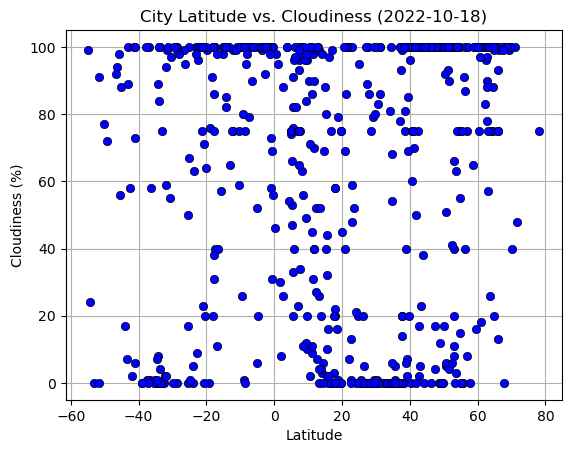

In [139]:
# Build the scatter plots for latitude vs. cloudiness
plt.plot(city_data_df["Lat"], 
         city_data_df["Cloudiness"], 
         marker="o", 
         markerfacecolor="blue",
         markeredgecolor="black", 
         markeredgewidth=0.5,
         linestyle="none")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

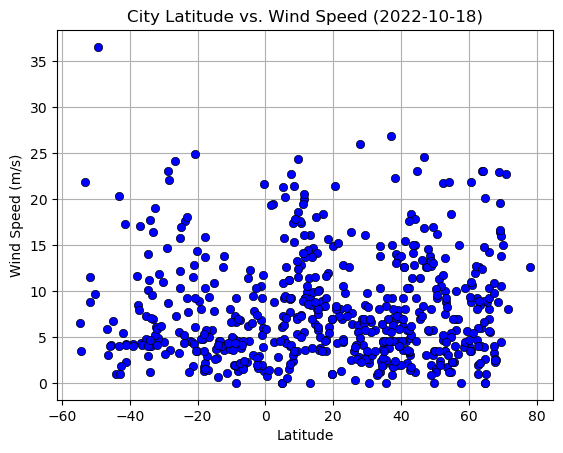

In [201]:
# Build the scatter plots for latitude vs. wind speed
plt.plot(city_data_df["Lat"], 
         city_data_df["Wind Speed"], 
         marker="o", 
         markerfacecolor="blue",
         markeredgecolor="black", 
         markeredgewidth=0.5,
         linestyle="none")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [141]:
# Define a function to create Linear Regression plots 
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Get regression values
# regress = x * slope + intercept

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [202]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,whitehorse,60.7161,-135.0538,6.03,82,100,21.85,CA,1704701237
2,longyearbyen,78.2186,15.6401,6.64,72,75,12.66,SJ,1704701246
4,yellowknife,62.4560,-114.3525,-30.71,99,96,4.72,CA,1704701398
5,qaqortoq,60.7167,-46.0333,33.82,77,100,8.77,GL,1704701399
6,tofol,5.3248,163.0078,82.47,80,47,21.27,FM,1704701400


In [203]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,38.14,97,99,6.49,AR,1704701173
3,waitangi,-43.9535,-176.5597,55.81,82,17,1.01,NZ,1704701397
8,paracuru,-3.4100,-39.0306,82.11,82,100,7.83,BR,1704701403
10,port mathurin,-19.6833,63.4167,81.75,70,99,8.88,MU,1704701405
11,port-aux-francais,-49.3500,70.2167,46.31,94,72,36.57,TF,1704701392


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7818641704624781


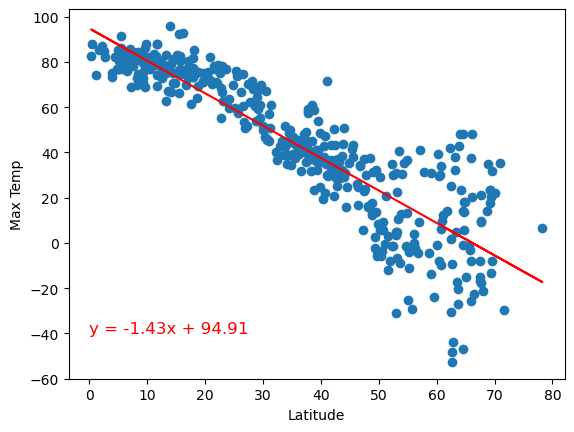

In [286]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df ["Lat"]
y = northern_hemi_df ["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

# print(line_eq)

plt.scatter(x,y)
plt.plot(x, regress, "r-")
plt.annotate(line_eq, (0, -40), fontsize=12, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.4642696433714927


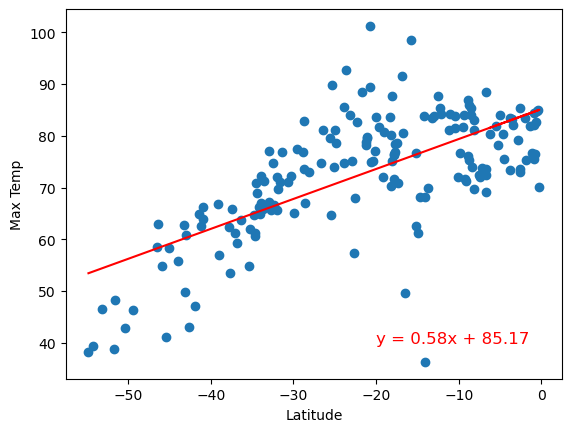

In [287]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df ["Lat"]
y = southern_hemi_df ["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x, regress, "r-")
plt.annotate(line_eq,(-20, 40), fontsize=12, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue**2}")

plt.show()

The Linear regression between the Nothern Hemisphere and the Max temperature displays a correlation between the higher the Latitude the lower the Temperature. This would indicate the further away from the hemisphere the cooler the temperature. The Southern Hemisphere displays the opposite correlation to the Northern Hemisphere, the higher temperatures reads correlate to higher latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19371412197162052


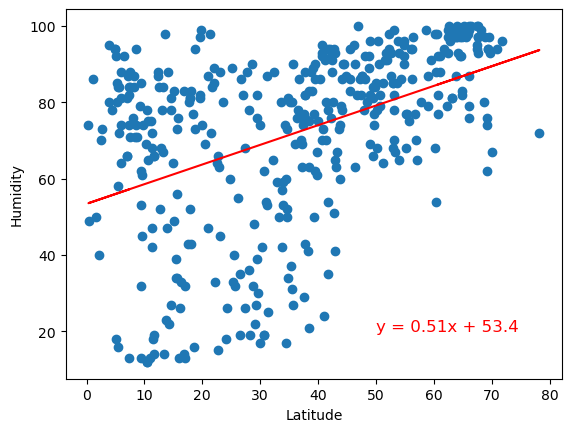

In [294]:
# Northern Hemisphere
x = northern_hemi_df ["Lat"]
y = northern_hemi_df ["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Filter out missing values
x = x.dropna()
y = y.dropna()

plt.scatter(x,y)
plt.plot(x, regress, "r-")
plt.annotate(line_eq, (50,20), fontsize=12, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.4642696433714927


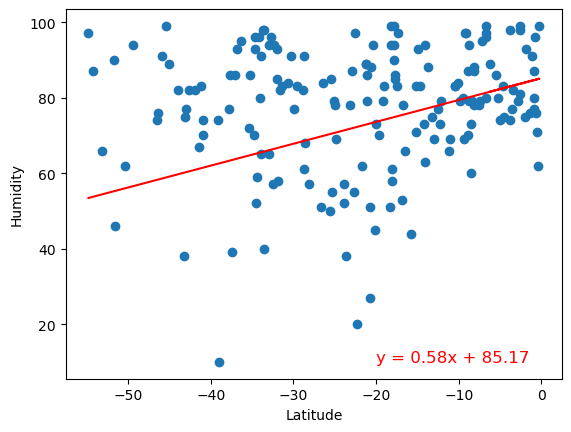

In [267]:
# Southern Hemisphere
x = southern_hemi_df ["Lat"]
y = southern_hemi_df ["Humidity"]

regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x, regress, "r-")
plt.annotate(line_eq, (-20,10), fontsize=12, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")

plt.show()

The Linear regression between the Nothern Hemisphere and the Humidity displays a correlation between the higher the Latitude the higher the Humidity. This would indicate the closer to the hemisphere the more humid it becomes. The Southern Hemisphere displays the lower the latitude the less humid the weather.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04628344779301127


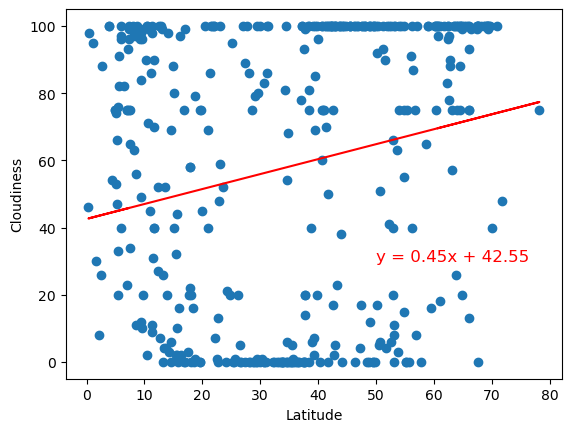

In [296]:
# Northern Hemisphere
x = northern_hemi_df ["Lat"]
y = northern_hemi_df ["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x, regress, "r-")
plt.annotate(line_eq, (50,30), fontsize=12, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.11485270480864934


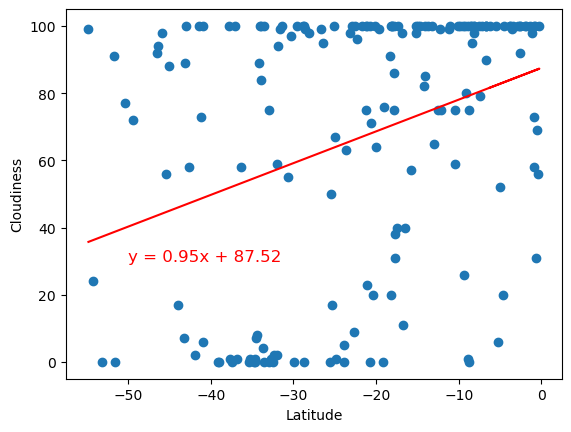

In [290]:
# Southern Hemisphere
x = southern_hemi_df ["Lat"]
y = southern_hemi_df ["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x, regress, "r-")
plt.annotate(line_eq, (-50, 30), fontsize=12, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")

plt.show()

The Linear regression between the Nothern Hemisphere and the Suouthern Hemisphere's Cloudiness displays an average cloudiness overall all latitudes. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.001183330667602022


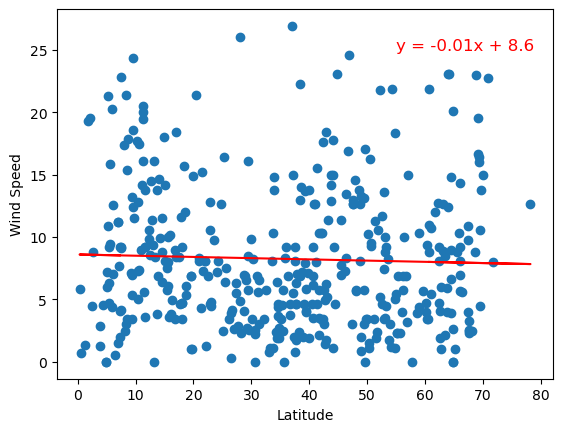

In [297]:
# Northern Hemisphere
x = northern_hemi_df ["Lat"]
y = northern_hemi_df ["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x, regress, "r-")
plt.annotate(line_eq, (55, 25), fontsize=12, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.04697493706556166


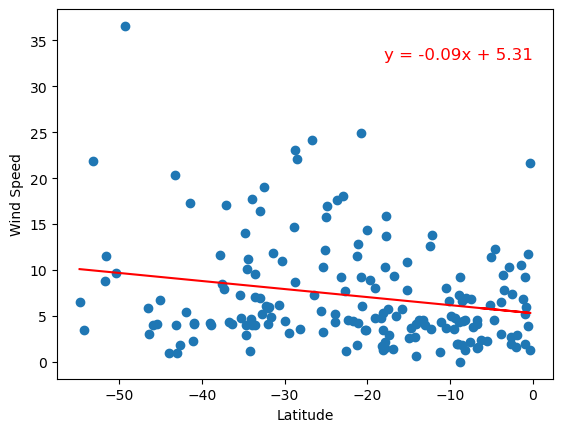

In [303]:
# Southern Hemisphere
x = southern_hemi_df ["Lat"]
y = southern_hemi_df ["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x, regress, "r-")
plt.annotate(line_eq, (-18, 33), fontsize=12, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue**2}")

plt.show()

The Linear regression between the Nothern Hemisphere and the Suouthern Hemisphere's Wind Speed indicates a moderate wind speed with little change for all latitudes.